**Problems:**     
    1- Classification : ( dog, cat --> binary classification) , ( Low, Miduim, High  --> Categorical Classification )    
    2- Regression     : predict actual value in continous range ( tempreature : 23, price : 14324 )    
    3- Clustering     : divide data ( unkown data ) into groups, why ? based on what ? how many groups ?  
    
**Clustering Algorithms**

1. Kmeans 
2. Hirarchial Clustering 
3. DB Scan


**Task:**  when to use each type of clustering ?

<h1 align='center' style='color:purple'>Clustering With K Means - Python Tutorial</h1>

In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("income.csv")
df

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


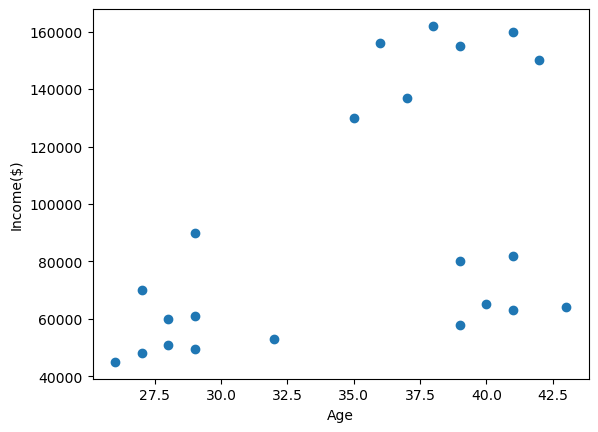

In [3]:
plt.scatter(df.Age,df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.show()

In [4]:
final = df.drop(["Name"] , axis= 1)
final

,Age,Income($)
0,27,70000
1,29,90000
2,29,61000
3,28,60000
4,42,150000
5,39,155000
6,41,160000
7,38,162000
8,36,156000
9,35,130000


In [5]:
km = KMeans(n_clusters=3) # model  = ... 
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted
# group 1 : 0 , Group 2 : 1,  group 3 : 2 

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0],
      dtype=int32)

In [6]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(final)
y_predicted

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0],
      dtype=int32)

In [7]:
df['cluster']= y_predicted
df

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1
5,Gautam,39,155000,1
6,David,41,160000,1
7,Andrea,38,162000,1
8,Brad,36,156000,1
9,Angelina,35,130000,1


In [8]:
km.cluster_centers_

array([[3.29090909e+01, 5.61363636e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.40000000e+01, 8.05000000e+04]])

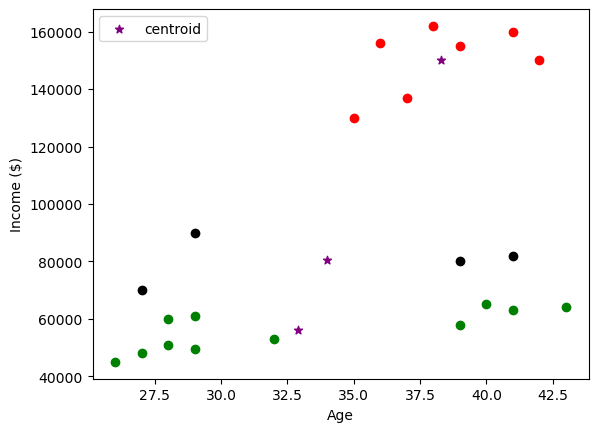

In [9]:
df1 = df[df.cluster==0] # group 0 
df2 = df[df.cluster==1] # group 1 
df3 = df[df.cluster==2] # group 2 
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

In [10]:
print(df.Age.min())
print(df.Age.max())
print(df["Income($)"].min())
print(df["Income($)"].max())

26
43
45000
162000


In [11]:
# normalization : 0 : 1, -1 :  1 , 80 : 90

<h4 style='color:purple'>Preprocessing using min max scaler</h4>

In [12]:
scaler = MinMaxScaler() # from 0 to 1

scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

#### Task: Standard Scaler , Robust Scaler

In [13]:
df["Income($)"].max()

1.0000000000000002

In [14]:
df["Income($)"].min()

0.0

In [15]:
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


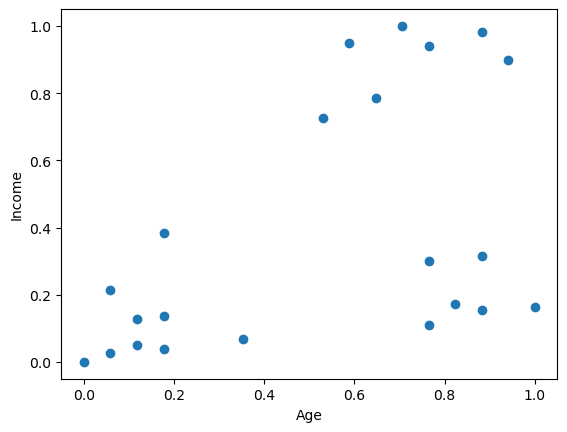

In [16]:
plt.scatter(df.Age,df['Income($)'])
plt.xlabel("Age")
plt.ylabel("Income")
plt.show()

In [23]:
final = df[['Age','Income($)']] 

In [24]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(final)
y_predicted

array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
      dtype=int32)

In [25]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,2


In [26]:
km.cluster_centers_

array([[0.85294118, 0.2022792 ],
       [0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ]])

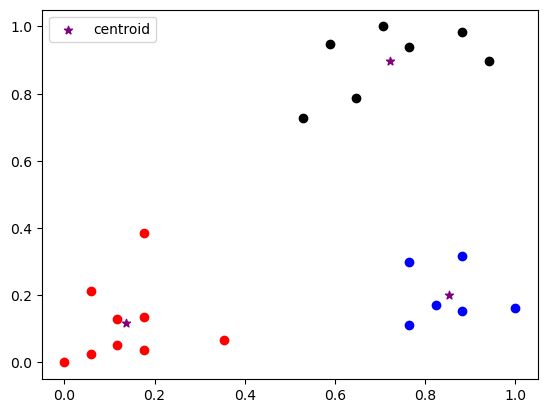

In [27]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='blue')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

### How to choose the right number of clusters? Elbow Plot 

In [33]:
sse = []
for i in range(2,20):
    km = KMeans(n_clusters=i) # 2, 3,4,5,6,7,
    km.fit(final)
    sse.append(km.inertia_)

In [29]:
sse

[2.091136388699078,
 0.4750783498553096,
 0.3491047094419566,
 0.2621792762345213,
 0.22407006551788158,
 0.1685851223602976,
 0.13717729016208896,
 0.11073569527418642,
 0.08026197041664467,
 0.061533596714222503,
 0.046811684349391744,
 0.03810151092446364,
 0.031034992989344867,
 0.02600205900341942,
 0.017977363432513813,
 0.011033819491365383,
 0.007513957485122411,
 0.005455122580932169]

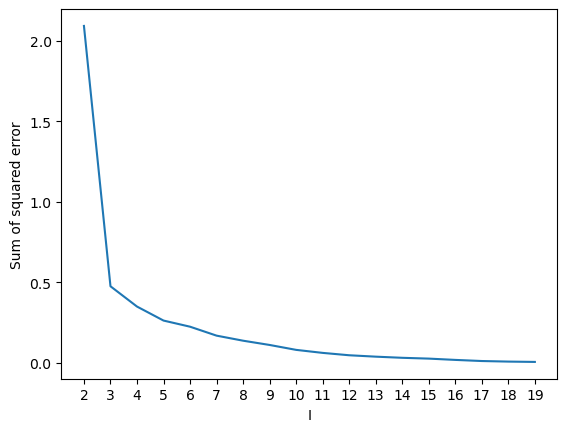

In [32]:
plt.xlabel('I')
plt.ylabel('Sum of squared error')
plt.xticks(range(2,20))
plt.plot(range(2,20),sse)

<h4 style='color:purple'>Exercise</h4>

<img src='iris.png' width=200 height=200>

1. Use iris flower dataset from sklearn library and try to form clusters of flowers using petal width and length features. Drop other two features for simplicity.
2. Figure out if any preprocessing such as scaling would help here
3. Draw elbow plot and from that figure out optimal value of k